In [1]:
# import train and test data paths from params
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
from all_params import TRAIN_DATA_PATH, TEST_DATA_PATH

images_train = os.listdir(TRAIN_DATA_PATH)
images_test = os.listdir(TEST_DATA_PATH)

# print number of train and test images
print('number of train images: ', len(images_train)/2)
print ('number of train_mask images: ', len(images_train)/2)
print ('number of test images: ', len(images_test))

number of train images:  169.0
number of train_mask images:  169.0
number of test images:  61


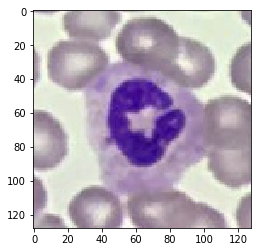

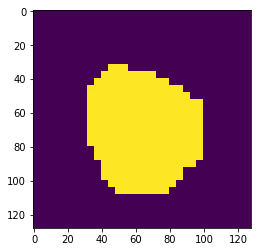

In [2]:
from skimage import io
import matplotlib.pyplot as plt

# showing train and mask images from Train_Data
image1 = io.imread('SigTuple_data/Train_Data/train-0.jpg')
image2 = io.imread('SigTuple_data/Train_Data/train-0-mask.jpg')

plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

In [3]:
import os
import cv2
import numpy as np
from all_params import *

image_names = os.listdir(TRAIN_DATA_PATH)
image_names.sort()

img_num = IMG_START_NUM
print('-'*30)
print('Creating new training images and store them in new_train_data_path...')
print('-'*30)
for img_name in image_names:
    if 'mask' in img_name:
        continue

    img = cv2.imread(TRAIN_DATA_PATH + img_name)
    mask_img = cv2.imread(TRAIN_DATA_PATH + img_name.split('.')[0] + '-mask.jpg')
    if img.shape == (IMG_ROWS, IMG_COLS, 3):
        cv2.imwrite(NEW_TRAIN_DATA_PATH + img_name, img)
        cv2.imwrite(NEW_TRAIN_DATA_PATH + img_name.split('.')[0] + '-mask.jpg', mask_img)
        continue
    if CREATE_EXTRA_DATA == True:
        continue

    for row in range(0, img.shape[0], IMG_ROWS):
        for col in range(0, img.shape[1], IMG_COLS):
            new_img = img[row:row + IMG_ROWS, col:col + IMG_COLS, :]
            new_mask_img = mask_img[row:row + IMG_ROWS, col:col + IMG_COLS, :]
            if new_img.shape != (IMG_ROWS, IMG_COLS, 3) or np.max(new_mask_img) != 255.0:
                continue
            cv2.imwrite(NEW_TRAIN_DATA_PATH + 'train-' + str(img_num) + '.jpg', new_img)
            cv2.imwrite(NEW_TRAIN_DATA_PATH + 'train-' + str(img_num) + '-mask.jpg', new_mask_img)
            img_num = img_num + 1
print('successfully created.')

------------------------------
Creating new training images and store them in new_train_data_path...
------------------------------
successfully created.


In [4]:
import os
import cv2
import numpy as np
from all_params import * 

path=NEW_TRAIN_DATA_PATH
augment=AUGMENT_TRAIN_DATA
image_names = os.listdir(path)
image_names.sort()
images_count = len(image_names) / 2
images_count = int(images_count)
print(images_count)
if augment == True:
    images_count = images_count * 3
   #print(images_count)
X_train = np.ndarray((images_count, 1, IMG_ROWS, IMG_COLS), dtype=np.uint8)
Y_train = np.ndarray((images_count, 1, IMG_ROWS, IMG_COLS), dtype=np.uint8)

i = 0
print('-'*30)
print('Creating training images...')
print('-'*30)
for img_name in image_names:
    if 'mask' in img_name:
        continue
    mask_img_name = img_name.split('.')[0] + '-mask.jpg'
    img = cv2.imread(path + img_name, cv2.IMREAD_GRAYSCALE)
    img[img <= CLEAN_THRESH] = 255
    mask_img = cv2.imread(path + mask_img_name, cv2.IMREAD_GRAYSCALE)
    X_train[i] = np.array([img])
    Y_train[i] = np.array([mask_img])
    i = i + 1

    if augment == True:
        X_train[i] = np.array([img[:, ::-1]])
        Y_train[i] = np.array([mask_img[:, ::-1]])
        i = i + 1
        X_train[i] = np.array([img[::-1, :]])
        Y_train[i] = np.array([mask_img[::-1, :]])
        i = i + 1
print('Loading done.')
X_train = X_train.transpose((0, 2, 3, 1))
Y_train = Y_train.transpose((0, 2, 3, 1))

182
------------------------------
Creating training images...
------------------------------
Loading done.
